# Precipitation variability and change
* Wenchang Yang (wenchang@princeton.edu)
* Princeton University

In [10]:
import xarray as xr, pandas as pd, cmocean

import xlearn

from geoplots import mapplot

%matplotlib notebook

## CHIRPS data

In [4]:
ds = xr.open_dataset('/tigress/wenchang/data/chirps/chirps-v2.0.monthly_p25.nc')
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 400, longitude: 1440, time: 452)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16 1981-02-14T12:00:00 ...
  * longitude  (longitude) float32 -179.875 -179.625 -179.375 -179.125 ...
  * latitude   (latitude) float32 -49.875 -49.625 -49.375 -49.125 -48.875 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    precip     (time, latitude, longitude) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.4 (http://mpimet.mp...
    history:           Wed Oct 10 14:34:06 2018: cdo monmean -cat chirps-v2.0...
    institution:       Climate Hazards Group.  University of California at Sa...
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    date_created:      2015-10-07
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    documentation:     http://pubs.usgs.gov/ds/832/
  

In [8]:
lons = (30, 52)
lats = (-10, 12)
da = ds.precip.sel(longitude=slice(*lons), latitude=slice(*lats)).mean(['longitude', 'latitude'])
da = da.isel(time=da.time.dt.season=='MAM').groupby('time.year').mean('time')
da

<xarray.DataArray 'precip' (year: 38)>
array([3.546535, 3.053069, 2.536448, 2.169288, 3.295461, 2.966124, 3.158378,
       2.85529 , 3.163076, 3.230315, 3.081399, 2.470829, 2.804373, 2.907151,
       2.998519, 2.952413, 3.133754, 2.889028, 2.791588, 2.23894 , 2.633858,
       2.888083, 2.724591, 2.507307, 2.784619, 3.254861, 2.613794, 2.567842,
       2.424717, 3.158933, 2.513442, 2.781026, 3.333433, 2.985518, 3.026074,
       3.234916, 2.737755, 4.386815])
Coordinates:
  * year     (year) int64 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 ...

In [12]:
ds.time

<xarray.DataArray 'time' (time: 452)>
array(['1981-01-16T00:00:00.000000000', '1981-02-14T12:00:00.000000000',
       '1981-03-16T00:00:00.000000000', ..., '2018-06-15T12:00:00.000000000',
       '2018-07-16T00:00:00.000000000', '2018-08-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-16 1981-02-14T12:00:00 1981-03-16 ...
Attributes:
    standard_name:  time
    bounds:         time_bnds
    axis:           T

<IPython.core.display.Javascript object>


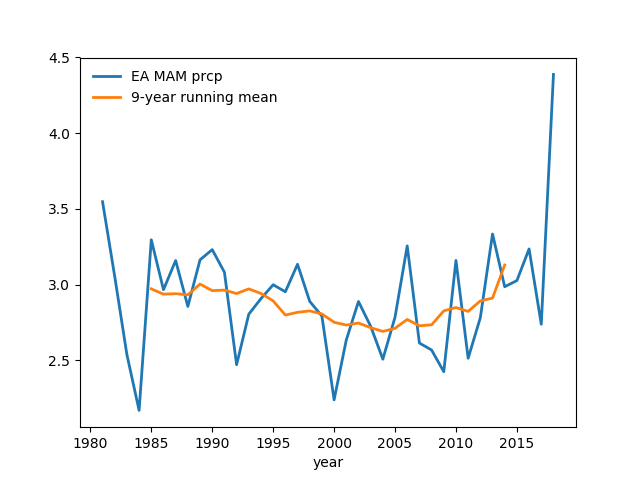

In [17]:
da.plot(label='EA MAM prcp')
da.rolling(year=9, center=True).mean().plot(label='9-year running mean')
plt.legend()

<IPython.core.display.Javascript object>


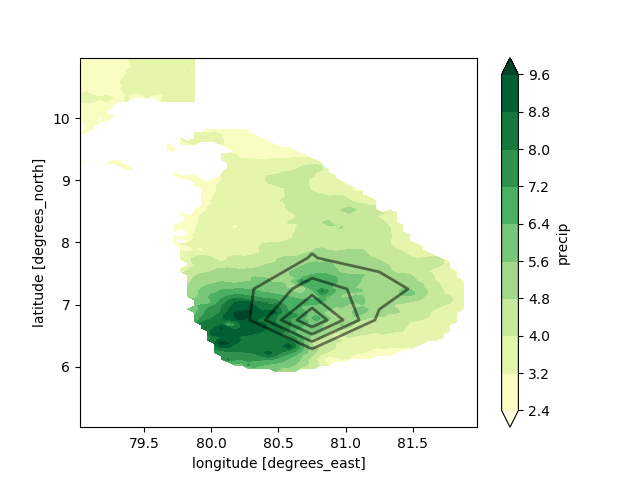

In [138]:
ds.precip.mean('time').plot.contourf(robust=True, levels=10, cmap='YlGn')
show_topo()

<IPython.core.display.Javascript object>


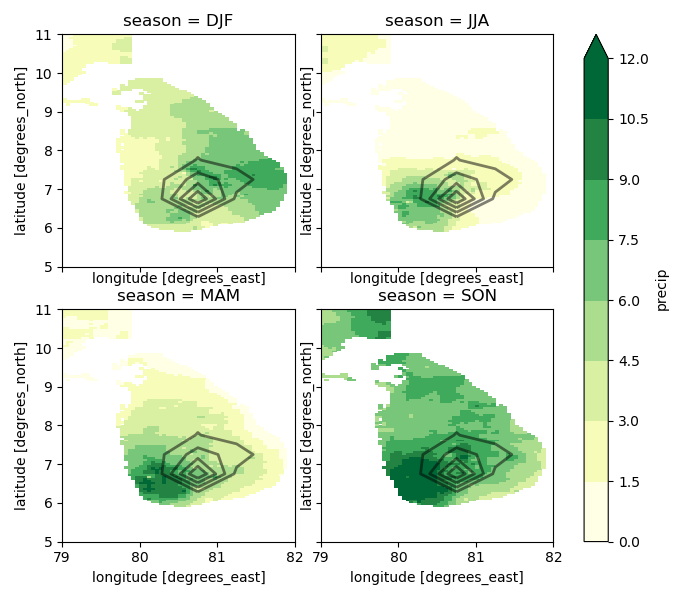

In [141]:
f = ds.precip.groupby('time.season').mean('time') \
    .plot(col='season', col_wrap=2, robust=True, levels=10, cmap='YlGn')
for ax in f.axes.flat:
    title = ax.get_title()
    show_topo(ax=ax)
    ax.set_title(title)

<IPython.core.display.Javascript object>


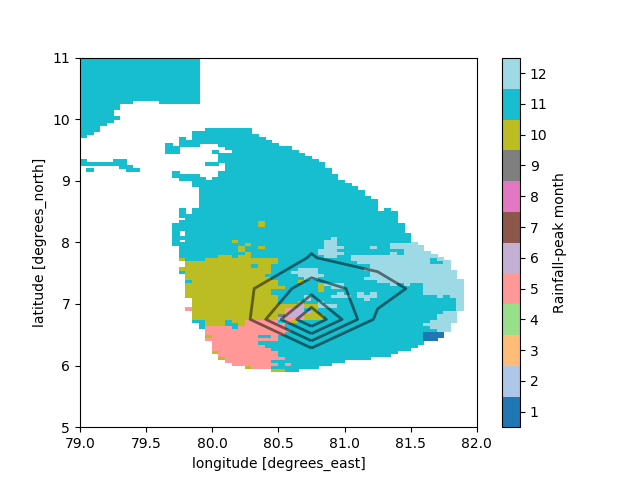

In [178]:
da = ds.precip.groupby('time.month').mean('time')
da = da.fillna(0).argmax('month').pipe(lambda x: da.month[x] + da.mean('month')*0)
da.rename('Rainfall-peak month').plot(levels=np.arange(.5, 12.6), cmap='tab20', 
                                      cbar_kwargs={'ticks': np.arange(1,13)})
show_topo()

<IPython.core.display.Javascript object>


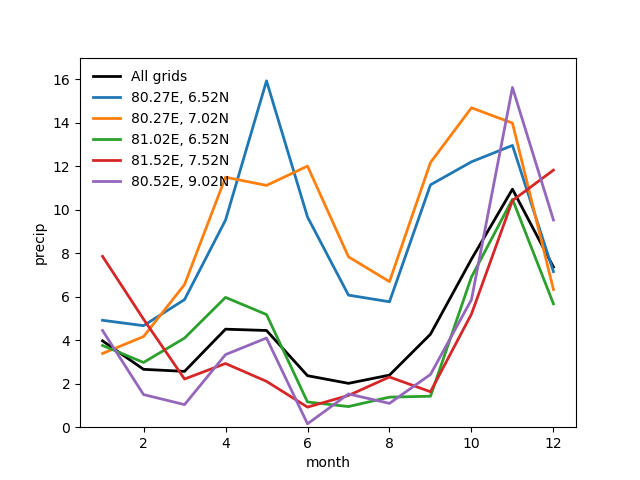

Text(0.5,1,'')

In [258]:
da = ds.precip.mean(['longitude', 'latitude']).groupby('time.month').mean('time')
da.plot(label='All grids', color='k')

lon, lat = 80.25, 6.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 80.25, 7
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 81, 6.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 81.5, 7.5
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')

lon, lat = 80.5, 9
da = ds.precip.sel(longitude=lon, latitude=lat, method='nearest').groupby('time.month').mean('time')
da.plot(label=f'{da.longitude.item():.2f}E, {da.latitude.item():.2f}N')


plt.legend()

plt.ylim(0, 17)
plt.title('')

<IPython.core.display.Javascript object>


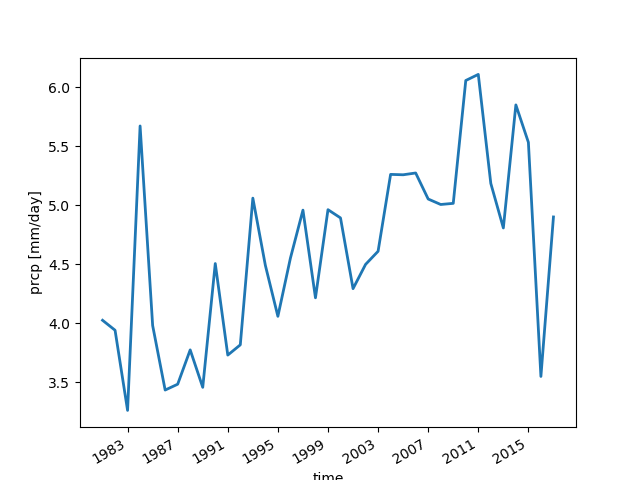

In [251]:
da = ds.precip.mean(['longitude', 'latitude']).resample(time='AS').mean('time')
da.rename('prcp [mm/day]').plot(label='Annual')

<IPython.core.display.Javascript object>


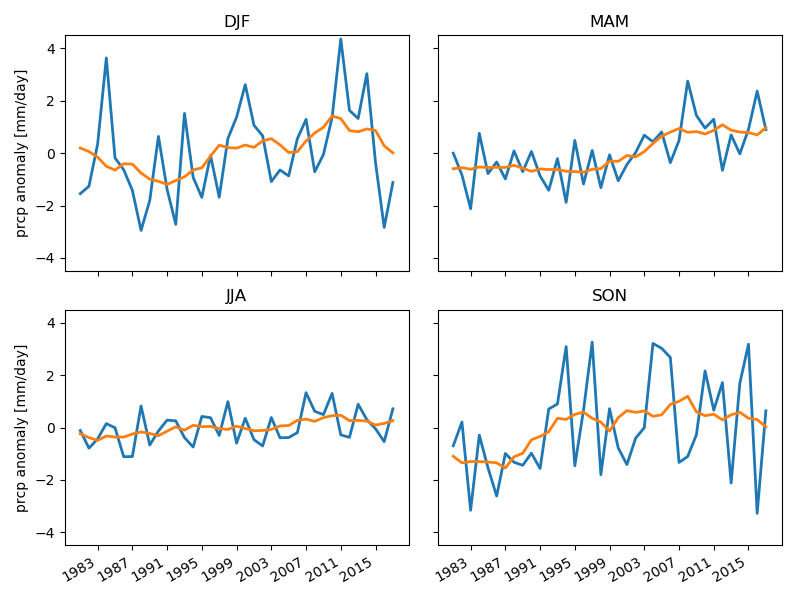

In [253]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))

seasons = ['DJF', 'MAM', 'JJA', 'SON']
for ax, season in zip(axes.flat, seasons):
    da = ds.precip.mean(['longitude', 'latitude']).isel(time=ds.time.dt.season==season).resample(time='AS').mean('time')
    da = da.pipe(lambda x: x - x.mean())
    da.plot(label=season, ax=ax)
    da.rolling(time=9, center=True, min_periods=1).mean().plot(ax=ax)
#     ax.legend(loc='lower left')
    ax.set_title(season)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    if season in ('DJF', 'JJA'):
        ax.set_ylabel('prcp anomaly [mm/day]')

plt.ylim(-4.5, 4.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


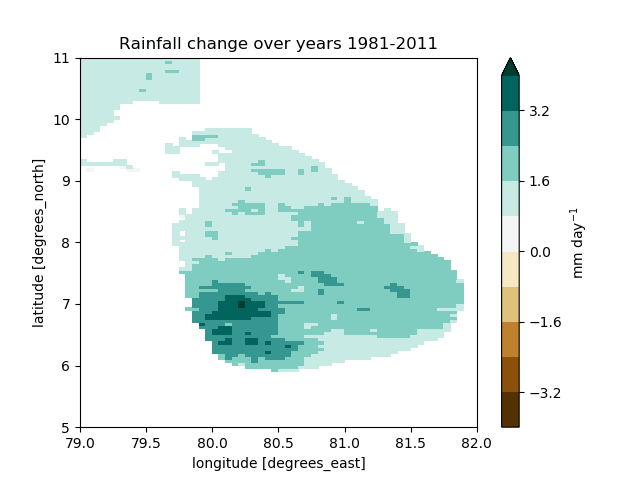

Text(0.5,1,'Rainfall change over years 1981-2011')

In [218]:
year0, year1 = 1981, 2011
da = ds.precip.sel(time=slice(f'{year0}', f'{year1}')).resample(time='AS').mean('time')
m = da.learn.regress(da['time.year'])

da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=10, center=0)
plt.title(f'Rainfall change over years {year0}-{year1}')

<IPython.core.display.Javascript object>


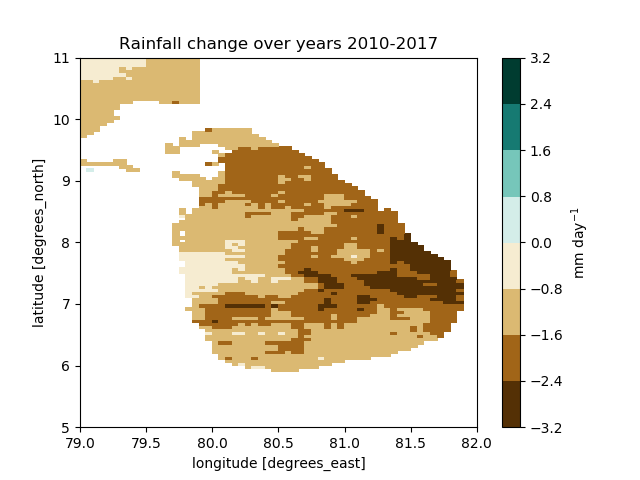

Text(0.5,1,'Rainfall change over years 2010-2017')

In [219]:
year0, year1 = 2010, 2017
da = ds.precip.sel(time=slice(f'{year0}', f'{year1}')).resample(time='AS').mean('time')
m = da.learn.regress(da['time.year'])

da = m.coef_da.pipe(lambda x: x*(year1-year0)).rename('mm day$^{-1}$')
da.plot(cmap='BrBG', robust=True, levels=10, center=0)
plt.title(f'Rainfall change over years {year0}-{year1}')

In [250]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>